In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
#test train split
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
#bidirectional lstm
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
goog = yf.Ticker("GOOG")
goog_df = goog.history(period="max")
goog_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.490664,2.591785,2.390042,2.499133,897427216,0.0,0.0
2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0.0,0.0
2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0.0,0.0
2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,0.0,0.0
2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0.0,0.0


In [4]:
goog_df.reset_index(inplace=True)

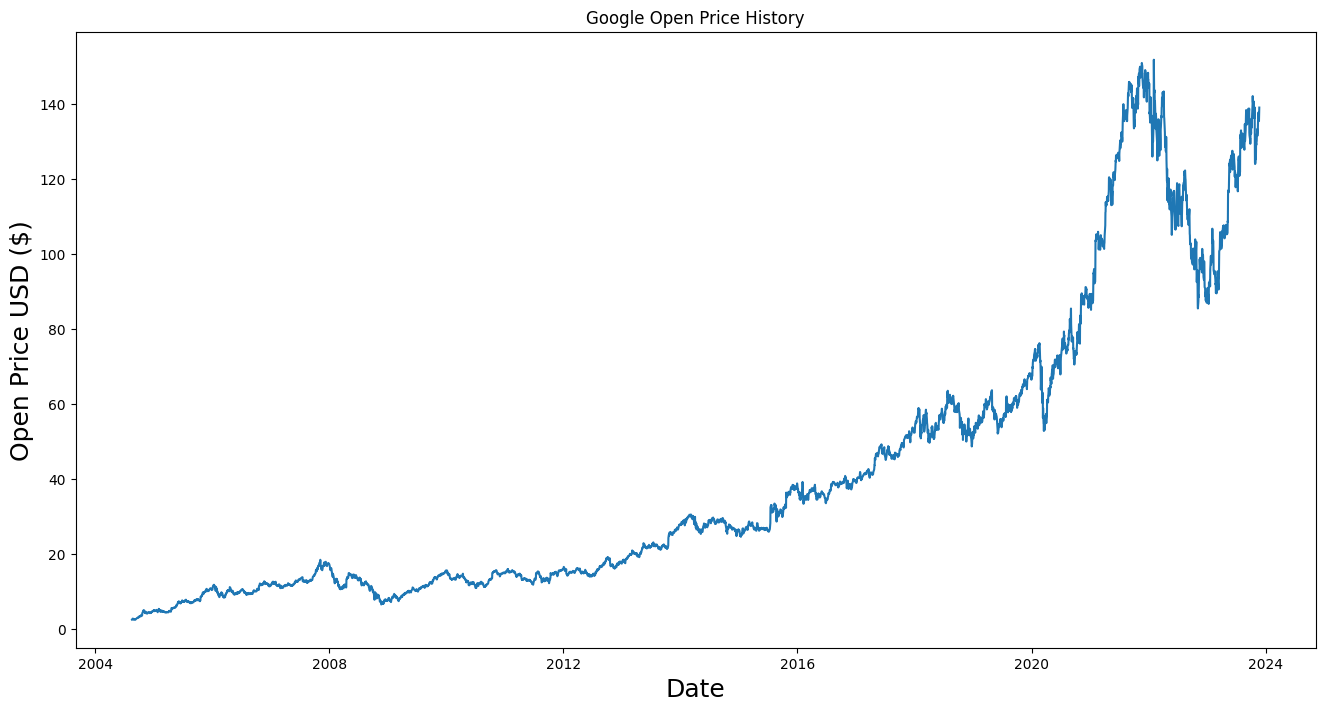

In [5]:
#plot the open price with date on x axis

plt.figure(figsize=(16,8))
plt.title('Google Open Price History')
plt.plot(goog_df['Date'],goog_df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()




In [6]:
#split the csv with top 4345 rows in train csv and bottom 482 rows in test csv
goog_df_train = goog_df.iloc[:4345]
goog_df_test = goog_df.iloc[4345:]

In [7]:
#training_set = train_data.iloc[:, 3:4].values
training_set=goog_df_train.iloc[:, 1:2].values
testing_set=goog_df_test.iloc[:, 1:2].values

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
# Creating a data structure with 15 timesteps and 1 output
X_train = []
y_train = []
for i in range(15, 4328):
    X_train.append(training_set_scaled[i-15:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(4328, 15)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape

(4328, 15, 1)

In [13]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

In [15]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

In [16]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 20, batch_size = 30)

Epoch 1/20
145/145 [==============================] - 17s 76ms/step - loss: 0.0035
Epoch 2/20
145/145 [==============================] - 11s 75ms/step - loss: 6.6758e-04
Epoch 3/20
145/145 [==============================] - 11s 75ms/step - loss: 8.5368e-04
Epoch 4/20
145/145 [==============================] - 31s 212ms/step - loss: 6.3210e-04
Epoch 5/20
145/145 [==============================] - 42s 288ms/step - loss: 6.6778e-04
Epoch 6/20
145/145 [==============================] - 36s 247ms/step - loss: 6.4899e-04
Epoch 7/20
145/145 [==============================] - 37s 255ms/step - loss: 5.6100e-04
Epoch 8/20
145/145 [==============================] - 19s 128ms/step - loss: 7.0867e-04
Epoch 9/20
145/145 [==============================] - 48s 333ms/step - loss: 4.3481e-04
Epoch 10/20
145/145 [==============================] - 34s 231ms/step - loss: 4.4623e-04
Epoch 11/20
145/145 [==============================] - 31s 213ms/step - loss: 4.8470e-04
Epoch 12/20
145/145 [================

In [17]:
dataset_total = pd.concat((goog_df_train['Open'], goog_df_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(goog_df_test) - 15:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(15, goog_df_test.shape[0]+15):
    X_test.append(inputs[i-15:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

16/16 [==============================] - 2s 24ms/step


In [18]:
real_stock_price = goog_df_test.iloc[:, 1:2].values

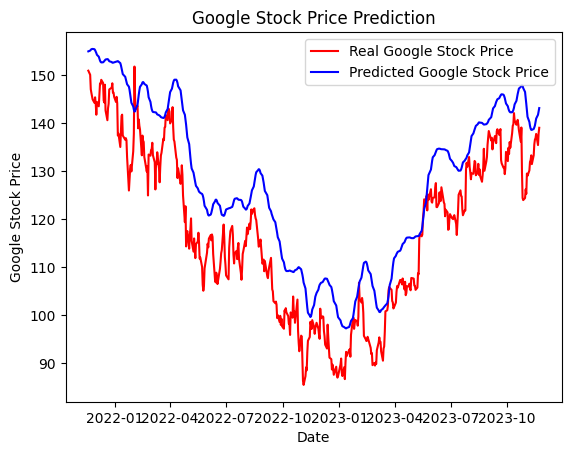

In [19]:
# Visualising the results
plt.plot(goog_df_test['Date'],real_stock_price,color = 'red', label = 'Real Google Stock Price')
plt.plot(goog_df_test['Date'],predicted_stock_price,color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [20]:
#mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real_stock_price, predicted_stock_price)

#abse
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
#rmse
from math import sqrt
rmse = sqrt(mse)
# print mse, mae and rmse
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('Root Mean Squared Error:',rmse)



Mean Squared Error: 119.76556174039234
Mean Absolute Error: 9.755267228230391
Root Mean Squared Error: 10.943745325088315
